In [ ]:
'''
In this notebook, we generate features using 2 algorithsm, KAZE and ORB
'''

In [1]:
#for array manipulations
import numpy as np
#for image processing
import cv2 
#for displaying images
import matplotlib.pyplot as plt
#to display images in this notebook, not in a separate window
%matplotlib inline
#to access system resources such as directories
import os

In [2]:
#Set this to point to the project root; all paths will be relative to this one
project_dir = '/home/lyle/notebooks/maize-disease-detection/'

In [3]:
def set_up_directories(project_dir=project_dir):
    """Sets up the paths to important direcoties
    
    Parameters
    ----------
    project_dir : string; default is the current working directory
        The path to the project root i.e '/home/lyle/tutorials/AI/scikit-learn/maize-disease-detection/'
    
    returns
    -------
    base_dir : string
        The project directory path
    data_folder : string
        The data subfolder path
    maize_data_folder : 
        The path to the subdirectory containing the maize images
        
    example usage
    -------------
    base_dir, data_folder, maize_data_folder = set_up_directories()
    """
    
    #set our base directory. This should point to the location of the plant-diseases folder
    base_dir = project_dir
    #set the path to our data folder
    data_folder = os.path.join(base_dir, 'data')
    #set the path to the maize folder and list the various categories available
    maize_data_folder = os.path.join(data_folder, 'maize')

    return base_dir, data_folder, maize_data_folder

def get_32(disease):
    """Loads 32 images for a given maize disease
    
    parameters
    ----------
    disease: string
        A string that could be common_rust, healthy, leaf_spot, nothern_leaf_blight
    returns
    -------
    disease_images: list
        A list of images for the selected disease
    """
    
    #this list will contain the 20 images returned
    disease_images = []
    #path to the images
    disease_images_path = os.path.join(maize_data_folder, disease)
    for image_path in os.listdir(disease_images_path):
        image_path = os.path.join(disease_images_path, image_path)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        disease_images.append(image)
    return disease_images

#This function will help us plot 10 images
def plot_images(images, title):
    """Plots 10 images of a particular disease category
    
    parameters
    ----------
    images: list
        List of images(each image is an array)
    title: string
        Title for each image i.e name of disease
    """
    
    plt.figure(figsize=(12,8))
    for i in range(10):
        plt.subplot(2,5, i+1)
        plt.imshow(images[i])
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
#This function allows us to resize images
def resize(image, new_size=(600,600)):
    """Resize the given image
    
    parameters
    ----------
    image : numpy array
        The image to be resized
    new_size : tuple
        The new image size
    returns
    -------
    resized_image : numpy arra
        The resized image
    """
    
    resized_image = cv2.resize(image, new_size)
    return resized_image

In [4]:
#Directories set up
base_dir, data_folder, maize_data_folder = set_up_directories()

In [5]:
common_rust_images = get_32('common_rust')
healthy_images = get_32('healthy')
leaf_spot_images = get_32('leaf_spot')
nothern_leaf_blight_images = get_32('nothern_leaf_blight')

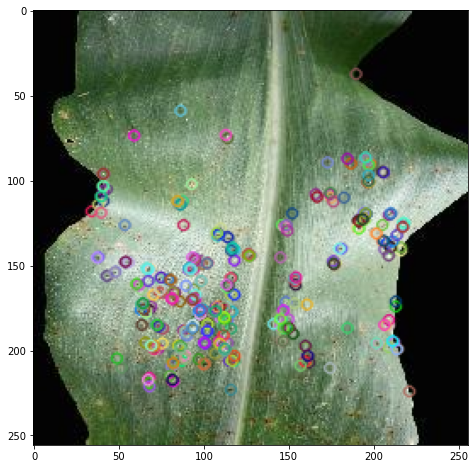

In [6]:
#We will use ORB to gnerate features
orb = cv2.ORB_create()
kps, ds = orb.detectAndCompute(common_rust_images[0], None)
with_keypoints = cv2.drawKeypoints(common_rust_images[0], kps, None)
plt.figure(figsize=(12,8))
plt.imshow(with_keypoints)

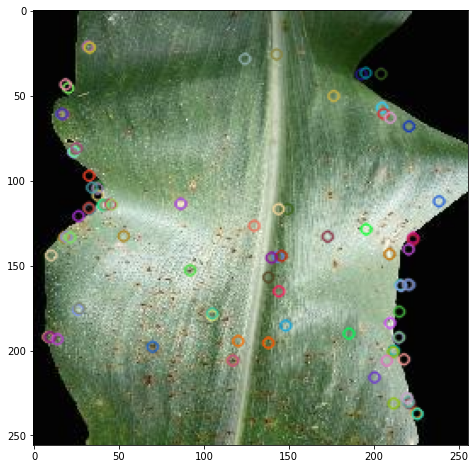

In [7]:
#We will use KAZE to generate features
kaze = cv2.KAZE_create()
kps, ds = kaze.detectAndCompute(common_rust_images[0], None)
with_keypoints = cv2.drawKeypoints(common_rust_images[0], kps, None)
plt.figure(figsize=(12,8))
plt.imshow(with_keypoints)

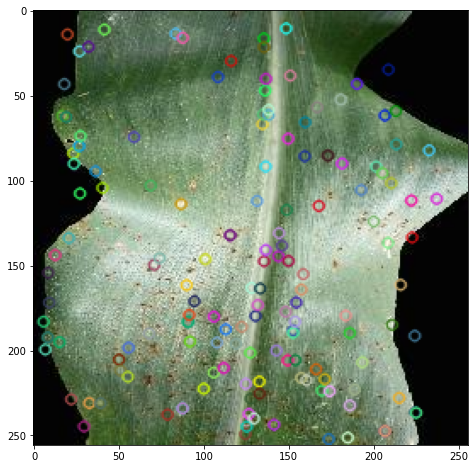

In [8]:
#We will use SIFT to generate features
# Create our SIFT detector and detect keypoints and descriptors
sift = cv2.SIFT_create()
kps, ds = sift.detectAndCompute(common_rust_images[0], None)
with_keypoints = cv2.drawKeypoints(common_rust_images[0], kps, None)
plt.figure(figsize=(12,8))
plt.imshow(with_keypoints)

In [9]:
"""
#We will use SURF to generate features
# Create our SURF detector and detect keypoints and descriptors
surf = cv2.SURF_create(400)
kps, ds = surf.detectAndCompute(common_rust_images[0], None)
with_keypoints = cv2.drawKeypoints(common_rust_images[0], kps, None)
plt.figure(figsize=(12,8))
plt.imshow(with_keypoints)
"""

'\n#We will use SURF to generate features\n# Create our SURF detector and detect keypoints and descriptors\nsurf = cv2.SURF_create(400)\nkps, ds = surf.detectAndCompute(common_rust_images[0], None)\nwith_keypoints = cv2.drawKeypoints(common_rust_images[0], kps, None)\nplt.figure(figsize=(12,8))\nplt.imshow(with_keypoints)\n'

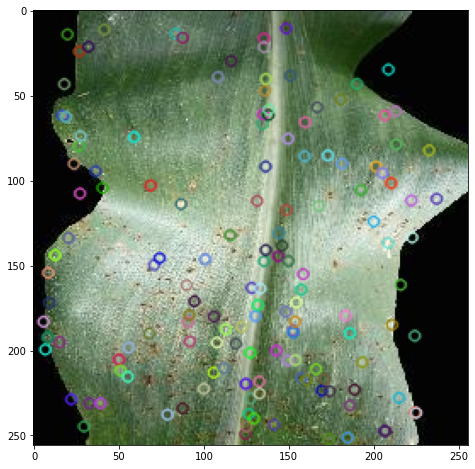

In [10]:
#We will use BRIEF to generate features
# Create our BRIEF detector and detect keypoints and descriptors
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(common_rust_images[0],None)
# compute the descriptors with BRIEF
kp, des = brief.compute(common_rust_images[0], kp)
with_keypoints = cv2.drawKeypoints(common_rust_images[0], kps, None)
plt.figure(figsize=(12,8))
plt.imshow(with_keypoints)

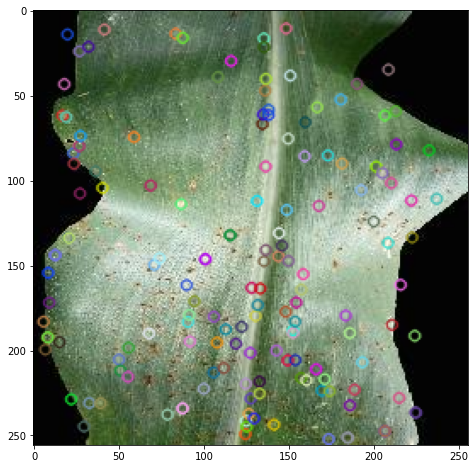

In [11]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = fast.detect(common_rust_images[0],None)
# compute the descriptors with BRIEF
kp, des = brief.compute(common_rust_images[0], kp)
with_keypoints = cv2.drawKeypoints(common_rust_images[0], kps, None)
plt.figure(figsize=(12,8))
plt.imshow(with_keypoints)

In [12]:
#This function generates ORB features
def extract_features_orb(image, vector_size=32):
    """Extracts orb features for the given image
    
    parameters
    ----------
    image : numpy array
        The image whose features are to be extracted
    vector_size : int
        The number of keypoints to use
    returns
    -------
        orb_decriptors : 
        
    raises
    ------
    cv2.error
    """
    try:
        feature_generator = cv2.ORB_create()
        orb_keypoints = feature_generator.detect(image)
        orb_keypoints = orb_keypoints[:32]
        orb_keypoints, orb_descriptors = feature_generator.compute(image, orb_keypoints)
        orb_descriptors = orb_descriptors.flatten()
        #The descriptor vector size is 128
        needed_size = (vector_size*128)
        if orb_descriptors.size < needed_size:
            #If we have less than 32 keypoints, add zeros to the end of our vector
            orb_descriptors = np.concatenate([orb_descriptors, np.zeros(needed_size - orb_descriptors.size)])
    except cv2.error as e:
        print(f'Error: {e}')
        return None
    return orb_descriptors

#This function generates KAZE features
def extract_features_kaze(image, vector_size=32):
    """Extracts kaze features for the given image
    
    parameters
    ----------
    image : numpy array
        The image whose features are to be extracted
    vector_size : int
        The number of keypoints to use
    returns
    -------
        kaze_descriptors : 
        
    raises
    ------
    cv2.error
    """
    try:
        feature_generator = cv2.KAZE_create()
        kaze_keypoints = feature_generator.detect(image)
        kaze_keypoints = kaze_keypoints[:32]
        kaze_keypoints, kaze_descriptors = feature_generator.compute(image, kaze_keypoints)
        kaze_descriptors = kaze_descriptors.flatten()
        #The descriptor vector size is 128
        needed_size = (vector_size*128)
        if kaze_descriptors.size < needed_size:
            #If we have less than 32 keypoints, add zeros to the end of our vector
            kaze_descriptors = np.concatenate([kaze_descriptors, np.zeros(needed_size - kaze_descriptors.size)])
    except cv2.error as e:
        print(f'Error: {e}')
        return None
    return kaze_descriptors

def get_hog(): 
    """Creates the hog operator
    
    returns
    -------
    hog:
    """
    winSize = (20,20)
    blockSize = (16,16)
    blockStride = (4,4)
    cellSize = (16,16)
    nbins = 9
    derivAperture = 1
    winSigma = -1.
    histogramNormType = 0
    L2HysThreshold = 0.2
    gammaCorrection = 1
    nlevels = 64
    signedGradient = True

    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels, signedGradient)

    return hog

def extract_hog_features(image, feature_size=4096):
    """Extracts hog features for the image
    
    parameters
    ----------
    image : numpy array
        The image whose features are to be extracted
    feature_size : int
        The number of features to generate
    returns
    -------
        hog_features : numpy array 
        
    raises
    ------
    cv2.error
    """
    hog = get_hog()
    features = hog.compute(image)
    required_features = features[:feature_size].ravel()
    return required_features 

In [13]:
#This function generates SIFT features
def extract_features_sift(image, vector_size=32):
    """Extracts sift features for the given image
    
    parameters
    ----------
    image : numpy array
        The image whose features are to be extracted
    vector_size : int
        The number of keypoints to use
    returns
    -------
        sift_descriptors : 
        
    raises
    ------
    cv2.error
    """
    try:
        feature_generator = cv2.SIFT_create()
        sift_keypoints = feature_generator.detect(image)
        sift_keypoints = sift_keypoints[:32]
        sift_keypoints, sift_descriptors = feature_generator.compute(image, sift_keypoints)
        sift_descriptors = sift_descriptors.flatten()
        #The descriptor vector size is 128
        needed_size = (vector_size*128)
        if sift_descriptors.size < needed_size:
            #If we have less than 32 keypoints, add zeros to the end of our vector
            sift_descriptors = np.concatenate([sift_descriptors, np.zeros(needed_size - sift_descriptors.size)])
    except cv2.error as e:
        print(f'Error: {e}')
        return None
    return sift_descriptors

#This function generates SURF features
def extract_features_surf(image, vector_size=32):
    """Extracts surf features for the given image
    
    parameters
    ----------
    image : numpy array
        The image whose features are to be extracted
    vector_size : int
        The number of keypoints to use
    returns
    -------
        surf_descriptors : 
        
    raises
    ------
    cv2.error
    """
    try:
        # Initiate FAST detector
        star = cv2.xfeatures2d.StarDetector_create()
        surf_keypoints = feature_generator.detect(image)
        surf_keypoints = surf_keypoints[:32]
        surf_keypoints, surf_descriptors = feature_generator.compute(image, surf_keypoints)
        surf_descriptors = surf_descriptors.flatten()
        #The descriptor vector size is 128
        needed_size = (vector_size*128)
        if surf_descriptors.size < needed_size:
            #If we have less than 32 keypoints, add zeros to the end of our vector
            sift_descriptors = np.concatenate([surf_descriptors, np.zeros(needed_size - surf_descriptors.size)])
    except cv2.error as e:
        print(f'Error: {e}')
        return None
    return surf_descriptors

#This function generates SIFT features
def extract_features_brief(image, vector_size=32, algorithm="star"):
    """Extracts features for the given image using BRIEF
    
    parameters
    ----------
    image : numpy array
        The image whose features are to be extracted
    vector_size : int
        The number of keypoints to use
    algorithm : string
        The algorithm to use; can be star or fast
    returns
    -------
        brief_descriptors : 
        
    raises
    ------
    cv2.error
    """
    try:
        alg = cv2.xfeatures2d.StarDetector_create()
        if algorithm == "fast":
            alg = cv2.FastFeatureDetector_create()
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
        
        kp = alg.detect(image, None)
        kp = kp[:32]
        kp, des = brief.compute(image, kp)
        des = des.flatten()
        #The descriptor vector size is 128
        needed_size = (vector_size*128)
        if des.size < needed_size:
            #If we have less than 32 keypoints, add zeros to the end of our vector
            des = np.concatenate([des, np.zeros(needed_size - des.size)])
    except cv2.error as e:
        print(f'Error: {e}')
        return np.array([])
    except AttributeError:
        return np.array([])
    return des

In [14]:
common_rust_image_orb_features = extract_features_orb(common_rust_images[0])
common_rust_image_kaze_features = extract_features_kaze(common_rust_images[0])
common_rust_image_hog_features = extract_hog_features(common_rust_images[0])
common_rust_image_sift_features = extract_features_sift(common_rust_images[0])
common_rust_image_brief_features = extract_features_brief(common_rust_images[0])
(common_rust_image_orb_features.shape, common_rust_image_kaze_features.shape, 
common_rust_image_hog_features.shape, common_rust_image_sift_features.shape, 
common_rust_image_brief_features.shape)

((4096,), (4096,), (4096,), (4096,), (4096,))

In [15]:
healthy_image_orb_features = extract_features_orb(healthy_images[0])
healthy_image_kaze_features = extract_features_kaze(healthy_images[0])
healthy_image_hog_features = extract_hog_features(healthy_images[0])
healthy_image_brief_features = extract_features_brief(healthy_images[0])
healthy_image_sift_features = extract_features_sift(healthy_images[0])
(healthy_image_orb_features.shape, healthy_image_kaze_features.shape,
 healthy_image_hog_features.shape, healthy_image_sift_features.shape, 
healthy_image_brief_features.shape)

((4096,), (4096,), (4096,), (4096,), (0,))

In [20]:
healthy_image_brief_features.shape[0]

0

In [18]:
leaf_spot_image_orb_features = extract_features_orb(leaf_spot_images[0])
leaf_spot_image_kaze_features = extract_features_kaze(leaf_spot_images[0])
leaf_spot_image_hog_features = extract_hog_features(leaf_spot_images[0])
leaf_spot_image_brief_features = extract_features_brief(leaf_spot_images[0])
leaf_spot_image_sift_features = extract_features_sift(leaf_spot_images[0])
(leaf_spot_image_orb_features.shape, leaf_spot_image_kaze_features.shape,
 leaf_spot_image_hog_features.shape, leaf_spot_image_brief_features.shape, 
leaf_spot_image_sift_features.shape)

((4096,), (4096,), (4096,), (4096,), (4096,))

In [19]:
nothern_leaf_blight_image_orb_features = extract_features_orb(nothern_leaf_blight_images[0])
nothern_leaf_blight_image_kaze_features = extract_features_kaze(nothern_leaf_blight_images[0])
nothern_leaf_blight_image_hog_features = extract_hog_features(nothern_leaf_blight_images[0])
nothern_leaf_blight_image_brief_features = extract_features_brief(nothern_leaf_blight_images[0])
nothern_leaf_blight_image_sift_features = extract_features_sift(nothern_leaf_blight_images[0])
(nothern_leaf_blight_image_orb_features.shape, nothern_leaf_blight_image_kaze_features.shape,
 nothern_leaf_blight_image_hog_features.shape, nothern_leaf_blight_image_brief_features.shape, 
nothern_leaf_blight_image_sift_features.shape)

((4096,), (4096,), (4096,), (4096,), (4096,))